In [ ]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/content/spam.csv', encoding='latin-1')


In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

In [ ]:
# Check the column names in your DataFrame
print(data.columns)

# Access the correct column using the appropriate name
# For example, if the column is named 'v2', use:
data['v2'][0]

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
print(data.columns)

# Access the correct column using the appropriate name
# For example, if the column is named 'v1', use:
data['v1'].value_counts()

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


,count
v1,
ham,4825
spam,747


In [ ]:
import seaborn as sns



Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


<Axes: xlabel='count', ylabel='v1'>

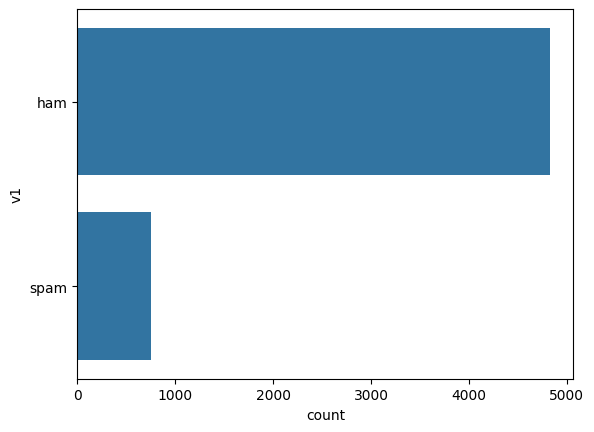

In [ ]:
print(data.columns)  # Print available columns to verify

# Assuming the column containing spam information is named 'v1', use:
sns.countplot(data['v1'])

In [ ]:
data.duplicated().sum()

403

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5126
Unnamed: 3,5159
Unnamed: 4,5164


In [ ]:
data.shape

(5169, 5)

<Axes: xlabel='count', ylabel='v1'>

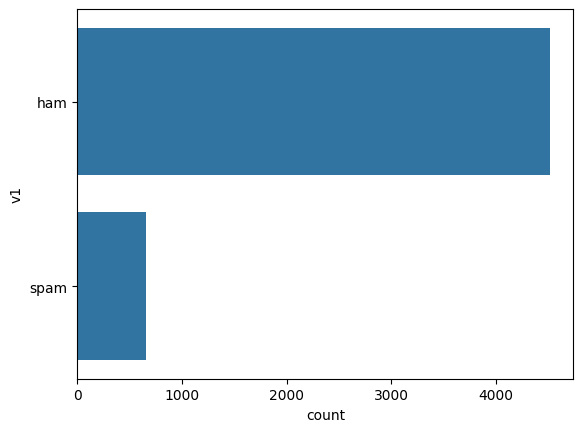

In [ ]:
sns.countplot(data['v1'])

In [ ]:
data['v1'].value_counts()

,count
v1,
ham,4516
spam,653


In [ ]:
X = data['v2'].values
y = data['v1'].values

In [ ]:
y


array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [ ]:
X_train.shape

(4135,)

In [ ]:
X_test.shape

(1034,)

In [ ]:
y_train.shape

(4135,)

In [ ]:
y_test.shape

(1034,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [ ]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(x_train.toarray())

4135

In [ ]:
len(x_train.toarray()[0])

7594

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
x_test = cv.transform(X_test)

In [ ]:
len(x_test.toarray())

1034

In [ ]:
len(x_test.toarray()[0])

7594

In [ ]:
y_pred = nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.9816247582205029

In [ ]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.9929866989117292

In [ ]:
email = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']

In [ ]:
clean_email = cv.transform(email)

In [ ]:
len(clean_email.toarray()[0])

7594

In [ ]:
check = nb.predict(clean_email)[0]

In [ ]:
sms = ['Hey i am Elon Musk. Get a brand new car from Tesla']

clean_email = cv.transform(sms)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a not a spam sms!")
else:
    print("This is a Spam sms!")

This is a Spam sms!
